In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
sys.path.append("../..")
from diachr import BaitAnalysis
from diachr import OriginalBaitAnalysis

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'results/original_bait_analysis'
OUT_PREFIX = 'OBA'
os.makedirs(NOTEBOOK_RESULTS_DIR, exist_ok=True)

# Analysis of original bait coordinates

We performed our analyses for the data of Mifsuf et al. 2015 using the genome build `hg38` and for the data of Schoenfelder 2015 using the genome build `mm10`. In both data sets, we observed baits with high repeat content. This is, at least for Schoenfelder's data, in contradiction to the bait selection criterion regarding mappability, according to which a bait must not contain more than three consecutive bases that were masked by repeatmasker. Here we investigate the original baits for the genome builds `hg19` and `mm9` in terms of GC, repeat and N content.

Note that reference genomes and corresponding indices (`fa.fai`) are required for this analysis. They can be downloaded and indexed in the following notebook: [Get_started.ipynb](../Get_started.ipynb).

## Bait selection criteria for [Mifsud et al. 2015](https://pubmed.ncbi.nlm.nih.gov/25938943/)

*Biotinylated 120-mer RNA baits were designed to target both ends of HindIII restriction fragments that overlap Ensembl promoters of protein-coding, noncoding, antisense, snRNA, miRNA and snoRNA transcripts. A target sequence was valid if its **GC content ranged between 25 and 65%** and the sequence contained **no more than two consecutive Ns** and was within 330 bp of the HindIII restriction fragment terminus.*

The bait sequences for `hg19` can be found in [Supplementary Table 4](https://static-content.springer.com/esm/art%3A10.1038%2Fng.3286/MediaObjects/41588_2015_BFng3286_MOESM48_ESM.xlsx) of the publication.

## Bait selection criteria for [Schoenfelder et al. 2015](https://pubmed.ncbi.nlm.nih.gov/25752748/)

*For each restriction fragment containing a transcription start site, two 120 bp capture probes were designed, one to each end of the fragment.Because of the size selection step following sonication, the probes had to fall entirely within a region no more than 500 bp from the end of the fragment. Each probe was required to have **no more than 3 consecutive bases masked by repeatmasker**, and they had to have a **GC content of 25 to 65%** to match the efficient capture range of the SureSelect target enrichment system (Agilent Technologies). Where multiple probes passed these criteria, the probe nearest the end of the restriction fragment was chosen.*

The bait sequences for `mm9` can be found in [Supplemental Table 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4381529/bin/supp_gr.185272.114_SuppTable1.xlsx) of the publication.

## Get original baits from publications

### Get original baits from Mifsud et al. 2015

In [2]:
!wget -O $NOTEBOOK_RESULTS_DIR/MIFSUD_baits.xlsx https://static-content.springer.com/esm/art%3A10.1038%2Fng.3286/MediaObjects/41588_2015_BFng3286_MOESM48_ESM.xlsx

--2024-07-04 15:20:44--  https://static-content.springer.com/esm/art%3A10.1038%2Fng.3286/MediaObjects/41588_2015_BFng3286_MOESM48_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 146.75.116.95
Connecting to static-content.springer.com (static-content.springer.com)|146.75.116.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8325700 (7.9M) [application/octet-stream]
Saving to: ‘results/original_bait_analysis/MIFSUD_baits.xlsx’

results/original_ba 100%[===================>]   7.94M  26.9MB/s    in 0.3s    

2024-07-04 15:20:45 (26.9 MB/s) - ‘results/original_bait_analysis/MIFSUD_baits.xlsx’ saved [8325700/8325700]



In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
# See: https://stackoverflow.com/questions/54976991/python-openpyxl-userwarning-unknown-extension-issue
df = pd.read_excel(NOTEBOOK_RESULTS_DIR + "/MIFSUD_baits.xlsx", sheet_name=4, header=None)
df

,0
0,>Chr1:847857-847976 - RP11-54O7.1-001
1,ACAGTCCAGTTATGAAGGCAGGGTTCCTGTGTAAGCCAGCAGGCCC...
2,>Chr1:848170-848289 + RP11-54O7.2-001
3,GCTTGGAGCTTCCTTTTCTGCACTCCACAGCAGGAAGAAGGGCAGT...
4,>Chr1:850382-850501 - RP11-54O7.2-001
...,...
75211,TAAAGCATATGAGCATAGCTGGAAGAGGTGAAGAAGTTGACAGATA...
75212,>ChrY:22918004-22918123 - RPS4Y2-001
75213,GTTGCACCGTAAAAGGAGAGGTTCTGTTCCGTCGCGGGATTTCGCC...
75214,">ChrY:23614691-23614810 - CYorf17-001,CYorf17-201"


In [4]:
# Create BED file with baits that can be loaded into the UCSC Genome Browser
author = "MIFSUD"
ucsc_bed_file = NOTEBOOK_RESULTS_DIR + '/' + author + '_baits.bed'
fh = open(ucsc_bed_file, 'w')
fh.write("track name=\"" + author + "_baits" + "\" description=\"" + author + "_baits" + "\" itemRgb=\"On\"" + '\n')

indices = list(range(0, len(df), 2))
for i in indices:
    coords = df.iloc[i][0]
    coords = coords.split(' ')[0][1:]
    chrom = coords.split(':')[0]
    chrom = chrom[0].lower() + chrom[1:]
    sta = str(int(coords.split(':')[1].split('-')[0]) - 1)
    end = coords.split(':')[1].split('-')[1]
    fh.write(chrom + '\t' + sta + '\t' + end + '\n')
fh.close()
print('Created: ' + ucsc_bed_file)

Created: results/original_bait_analysis/MIFSUD_baits.bed


### Get original baits from Schoenfelder et al. 2015

In [5]:
!wget -O $NOTEBOOK_RESULTS_DIR/SCHOEN_baits.xlsx https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4381529/bin/supp_gr.185272.114_SuppTable1.xlsx

--2024-07-04 15:20:47--  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4381529/bin/supp_gr.185272.114_SuppTable1.xlsx
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 130.14.29.110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|130.14.29.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3679986 (3.5M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘results/original_bait_analysis/SCHOEN_baits.xlsx’

results/original_ba 100%[===================>]   3.51M  3.76MB/s    in 0.9s    

2024-07-04 15:20:48 (3.76 MB/s) - ‘results/original_bait_analysis/SCHOEN_baits.xlsx’ saved [3679986/3679986]



In [6]:
df = pd.read_excel(NOTEBOOK_RESULTS_DIR + "/SCHOEN_baits.xlsx", sheet_name=0)
df

,Chr,Start,End,Strand,Name,Sequence
0,chr1,3090914,3091033,+,U6.149-201,GCTTTCTCTTCCAAAGTAATAAGCCATAAAAAAATCAGAGCACTTT...
1,chr1,3092437,3092556,-,U6.149-201,TTTGGTGAATTAAAAGTGGACTAAATAAGCAATACCAATAACAATA...
2,chr1,3455978,3456097,+,Gm1992-001,TAAACTATCTCTCCAGCCCTTTCATGGAGAGCAGATTCATTGTTGC...
3,chr1,3457630,3457749,-,Gm1992-001,TCTTCCTGGGATTGTTCCCTAGGCAGGAGCCCTTAGACTATATAAA...
4,chr1,3659723,3659842,+,Xkr4-001,AAGTCAAAAGAACAGATTTCTGAGCATATTGTCCCACCACATTCCT...
...,...,...,...,...,...,...
39016,chrY,623230,623349,-,Ddx3y-201,ACTTGGAACTTTCTTCAGTTGAAGGATCTTAAGCATACCAGTCAGT...
39017,chrY,640751,640870,+,U6.528-201,GCTTTTGTAAGTTTCATTTTTGCACTATGAGATTTCTCTAAAAAAT...
39018,chrY,645348,645467,-,U6.528-201,GATTATAAGAGATCACTTTGAATTATAAATAAGCTAACAGTTTATG...
39019,chrY,796968,797087,-,Usp9y-001,CTTCAAGCTGGTGAGGGAATGATGGTTTTGTCTAAGTGATCAACTT...


In [7]:
# Create BED file with baits that can be loaded into the UCSC Genome Browser
author = "SCHOEN"
ucsc_bed_file = NOTEBOOK_RESULTS_DIR + '/' + author + '_baits.bed'
fh = open(ucsc_bed_file, 'w')
fh.write("track name=\"" + author + "_baits" + "\" description=\"" + author + "_baits" + "\" itemRgb=\"On\"" + '\n')
for i in df.index:
    chrom = df.iloc[i]['Chr']
    sta = str(df.iloc[i]['Start'] - 1)
    end = str(df.iloc[i]['End'])
    if chrom == "chrMT":
        chrom = "chrM"
    fh.write(chrom + '\t' + sta + '\t' + end + '\n')
fh.close()
print('Created: ' + ucsc_bed_file)

Created: results/original_bait_analysis/SCHOEN_baits.bed


The baits can be loaded as a custom track in the UCSC genome browser:

1. Go to the [UCSC genome browser](https://genome.ucsc.edu)
2. For the Mifsud baits, select the [genome build hg19](https://genome-euro.ucsc.edu/cgi-bin/hgTracks?db=hg19) (and the [genome build mm9](https://genome-euro.ucsc.edu/cgi-bin/hgTracks?db=mm9) for the Schoenfelder baits)
3. Find the RepeatMasker track and move it to the top
4. Click the **Add custom track** button below the track window
5. Click the **Choose File** button
6. Select the file `results/original_bait_analysis/MIFSUD_baits.bed` (the other BED file for the Schoenfelder baits)
7. Confirm by clicking the **Submit** button
8. Click the **Go to first annotation** button

## Analyze baits with respect to GC, repeat and N content

In order to keep the layout of the notebook clear, we outsourced some parts of the analysis to a separate Python class.

In [8]:
oba = OriginalBaitAnalysis()

We perform the analysis for the baits of Mifsud and Schoenfelder in parallel and compare the results at the end.

In [9]:
DATA_DICT = {
    'MIFSUD':
    {
        'GENOME_FILE': '../../additional_files/reference_sequence/hg19_genome.fa',
        'BAIT_BED_FILE': NOTEBOOK_RESULTS_DIR + '/' + 'MIFSUD' + '_baits.bed',
        'CONTENTS': {'GC': [], 'REP': [], 'N': []}
    },
    'SCHOEN':
    {
        'GENOME_FILE': '../../additional_files/reference_sequence/mm9_genome.fa',
        'BAIT_BED_FILE': NOTEBOOK_RESULTS_DIR + '/' + 'SCHOEN' + '_baits.bed',
        'CONTENTS': {'GC': [], 'REP': [], 'N': []}
    }
}

We determine the GC, Repeat and N content of each bait.

In [36]:
for author in DATA_DICT.keys():
    print(author)
    GENOME_FILE = DATA_DICT[author]['GENOME_FILE']
    BAIT_BED_FILE = DATA_DICT[author]['BAIT_BED_FILE']
    ba = BaitAnalysis()
    ba.init_bait_seq_dict(genome_fasta_file=GENOME_FILE,
                                 bait_bed_file=BAIT_BED_FILE,
                                 working_directory=NOTEBOOK_RESULTS_DIR)
    
    # Create BED file with repetitive baits that can be loaded into the UCSC Genome Browser
    ucsc_bed_file = NOTEBOOK_RESULTS_DIR + '/' + author + '_repetitive_baits.bed'
    print('\t' + ucsc_bed_file)
    fh = open(ucsc_bed_file, 'w')
    fh.write("track name=\"" + author + "_repetitive_baits" + "\" description=\"" + author + "_repetitive_baits" + "\" itemRgb=\"On\"" + '\n')

    # Get GC, repeat and N content for each bait
    for coords, seq in ba.BAIT_SEQ_dict.items():
        DATA_DICT[author]['CONTENTS']['GC'].append(ba.get_gc_content_seq(seq))
        DATA_DICT[author]['CONTENTS']['REP'].append(ba.get_repeat_content_seq(seq))
        DATA_DICT[author]['CONTENTS']['N'].append(oba.get_n_content_seq(seq))
        # Write repetitive to BED file
        if 0.5 <= ba.get_repeat_content_seq(seq):
            fh.write(coords + '\n')
    fh.close()

MIFSUD
	results/original_bait_analysis/MIFSUD_repetitive_baits.bed
SCHOEN
	results/original_bait_analysis/SCHOEN_repetitive_baits.bed


The generated BED files contain all baits that consist of 50% or more repetitive sequence and can be loaded into the UCSC Genome Browser as described above.

## Presentation of results

Determine the number of baits that consist of more than 50% and 100% repetitive sequence.

In [11]:
for author in ['MIFSUD', 'SCHOEN']:
    print(author)
    for minc in [0.5, 1.0]:
        total = len(DATA_DICT[author]['CONTENTS']['REP'])
        n = len([rep for rep in DATA_DICT[author]['CONTENTS']['REP'] if minc <= rep])
        f = "{:.2f}".format(n/total * 100)
        print('\t' + "Number of baits with repeat content equal or greater " + str(minc) + ": " + str(n) + ' (' + f + '%)')

MIFSUD
	Number of baits with repeat content equal or greater 0.5: 7796 (20.73%)
	Number of baits with repeat content equal or greater 1.0: 3980 (10.58%)
SCHOEN
	Number of baits with repeat content equal or greater 0.5: 5485 (14.06%)
	Number of baits with repeat content equal or greater 1.0: 2510 (6.43%)


For comparison, plot all results for the baits of Mifsud and Schoenfelder in two boxplots.

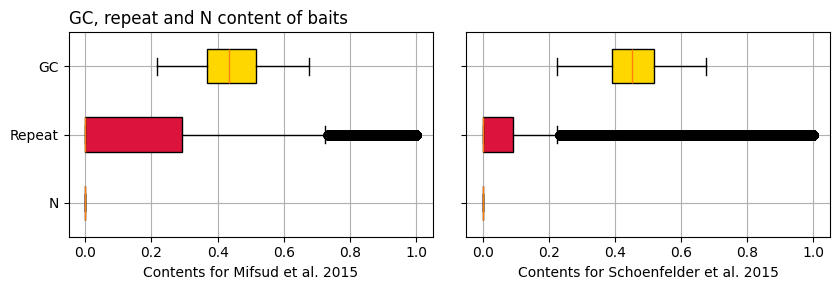

In [12]:
oba.create_contents_boxplot(
    gc_l=DATA_DICT['MIFSUD']['CONTENTS']['GC'],
    gc_r=DATA_DICT['SCHOEN']['CONTENTS']['GC'],
    rep_l=DATA_DICT['MIFSUD']['CONTENTS']['REP'],
    rep_r=DATA_DICT['SCHOEN']['CONTENTS']['REP'],
    n_l=DATA_DICT['MIFSUD']['CONTENTS']['N'],
    n_r=DATA_DICT['SCHOEN']['CONTENTS']['N'],
    title='GC, repeat and N content of baits',
    xlabel_l='Contents for Mifsud et al. 2015',
    xlabel_r='Contents for Schoenfelder et al. 2015',
    output_pdf=NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX  + '_gc_repeat_n_content_of_baits.pdf')

Calculate summary statistics and store them in pandas dataframes.

In [13]:
df_dict = {}
for content in ['GC', 'REP', 'N']:
    df = pd.DataFrame(index=['MIFSUD', 'SCHOEN'])
    for author in DATA_DICT.keys():
        df.at[author,'n'] = int(len(DATA_DICT[author]['CONTENTS'][content]))
        df.at[author, 'min(' + content + ')'] = min(DATA_DICT[author]['CONTENTS'][content])
        df.at[author, 'max(' + content + ')'] = max(DATA_DICT[author]['CONTENTS'][content])
        df.at[author, 'Q1(' + content + ')'] = np.quantile(DATA_DICT[author]['CONTENTS'][content], 0.25)
        df.at[author, 'Q2(' + content + ')'] = np.quantile(DATA_DICT[author]['CONTENTS'][content], 0.50)
        df.at[author, 'Q3(' + content + ')'] = np.quantile(DATA_DICT[author]['CONTENTS'][content], 0.75)
    df = df.astype({"n": int})
    for col in df.columns[1:]:
        df[col] = df[col].map('{:,.3f}'.format)
    df_dict[content] = df

#### GC content

There are baits from both Mifsud et al. 2015 and Schoenfelder et al. 2015 that have a GC content that does not meet the selection criterion, i.e. less than 25% or more than 65% GC content.

In [14]:
df_dict['GC']

,n,min(GC),max(GC),Q1(GC),Q2(GC),Q3(GC)
MIFSUD,37608,0.217,0.675,0.367,0.433,0.517
SCHOEN,39021,0.225,0.675,0.392,0.450,0.517


#### Repeat content

25% of the baits of Mifsud et al. have a repeat content of more than 29%. 25% of the baits from Schoenfelder et al. have a repeat content of more than 9%.

In [15]:
df_dict['REP']

,n,min(REP),max(REP),Q1(REP),Q2(REP),Q3(REP)
MIFSUD,37608,0.000,1.000,0.000,0.000,0.292
SCHOEN,39021,0.000,1.000,0.000,0.000,0.092


Neither the baits from Mifsud nor those from Schoenfelder contain Ns.

In [16]:
df_dict['N']

,n,min(N),max(N),Q1(N),Q2(N),Q3(N)
MIFSUD,37608,0.000,0.000,0.000,0.000,0.000
SCHOEN,39021,0.000,0.000,0.000,0.000,0.000


Present the repeat content of baits in histograms as an alternative representation.

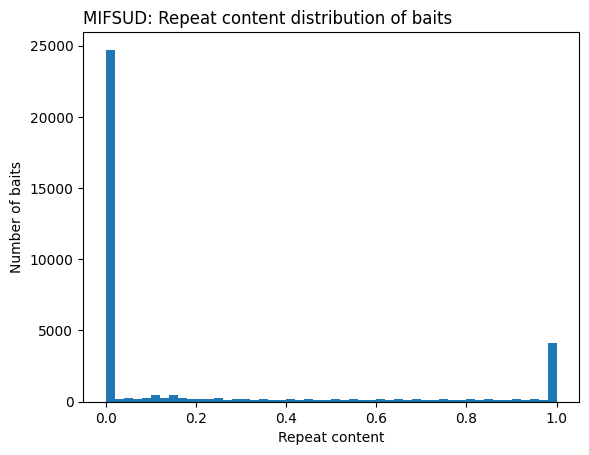

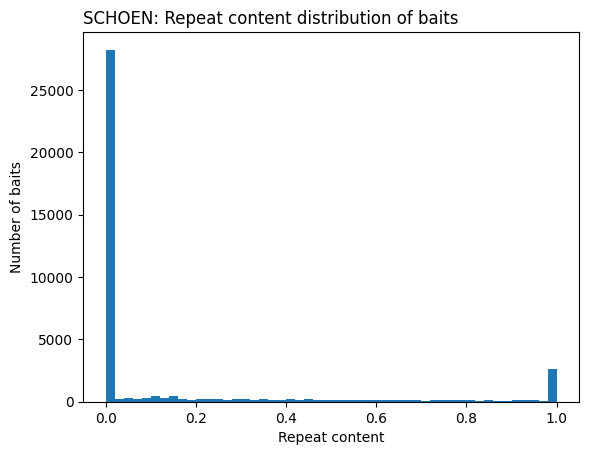

In [17]:
for author in ['MIFSUD', 'SCHOEN']:
    for ctype in ['REP']:
        plt.hist(DATA_DICT[author]['CONTENTS'][ctype], 50)
        plt.title(author + ": Repeat content distribution of baits", loc='left')
        plt.ylabel("Number of baits")
        plt.xlabel("Repeat content")
        plt.show()

## Random baits

In [24]:
# Create BED file with chromosome sizes from FASTA file
import pyfaidx
author = 'MIFSUD'
GENOME = "hg19" # "mm9"
REF_DIR = '../../additional_files/reference_sequence/'
GENOME_FASTA = REF_DIR + GENOME + "_genome.fa"
GENOME_CHR_SIZES = REF_DIR + GENOME + '_genome_chr_sizes.bed'
fh = open(GENOME_CHR_SIZES, "w")
p = pyfaidx.Fasta(GENOME_FASTA)
for chrom, f in p.items():
    length = len(f)
    fh.write(chrom + '\t0\t' + str(length) + '\n')
fh.close()
!head $GENOME_CHR_SIZES

chr1	0	249250621
chr2	0	243199373
chr3	0	198022430
chr4	0	191154276
chr5	0	180915260
chr6	0	171115067
chr7	0	159138663
chrX	0	155270560
chr8	0	146364022
chr9	0	141213431


In [26]:
# Create file with <chr_name>\t<seq> lines
import pybedtools
chrom_seqs = pybedtools.BedTool(GENOME_CHR_SIZES)
chrom_seqs.sequence(fi=GENOME_FASTA, fo=NOTEBOOK_RESULTS_DIR + "tmp.txt", tab=True)

<BedTool(../../additional_files/reference_sequence/hg19_genome_chr_sizes.bed)>

In [27]:
# Create dictionary with chromosome sequences using chromosome names as keys
CHROM_SEQ_dict = {}
with open(NOTEBOOK_RESULTS_DIR + "tmp.txt", 'rt') as fp:
    for line in fp:
        coords, seq = line.rstrip().split('\t')
        chrom = coords.split(':')[0]
        CHROM_SEQ_dict[chrom] = seq
os.remove(NOTEBOOK_RESULTS_DIR + "tmp.txt")
CHR_SIZES = {}
for chrom, seq in CHROM_SEQ_dict.items():
    CHR_SIZES[chrom] = len(seq)
    print(chrom + '\t' + str(len(seq)))

chr1	249250621
chr2	243199373
chr3	198022430
chr4	191154276
chr5	180915260
chr6	171115067
chr7	159138663
chrX	155270560
chr8	146364022
chr9	141213431
chr10	135534747
chr11	135006516
chr12	133851895
chr13	115169878
chr14	107349540
chr15	102531392
chr16	90354753
chr17	81195210
chr18	78077248
chr20	63025520
chrY	59373566
chr19	59128983
chr22	51304566
chr21	48129895
chr6_ssto_hap7	4928567
chr6_mcf_hap5	4833398
chr6_cox_hap2	4795371
chr6_mann_hap4	4683263
chr6_apd_hap1	4622290
chr6_qbl_hap6	4611984
chr6_dbb_hap3	4610396
chr17_ctg5_hap1	1680828
chr4_ctg9_hap1	590426
chr1_gl000192_random	547496
chrUn_gl000225	211173
chr4_gl000194_random	191469
chr4_gl000193_random	189789
chr9_gl000200_random	187035
chrUn_gl000222	186861
chrUn_gl000212	186858
chr7_gl000195_random	182896
chrUn_gl000223	180455
chrUn_gl000224	179693
chrUn_gl000219	179198
chr17_gl000205_random	174588
chrUn_gl000215	172545
chrUn_gl000216	172294
chrUn_gl000217	172149
chr9_gl000199_random	169874
chrUn_gl000211	166566
chrUn_gl000213	1

In [34]:
import random 
random_radius = 500
gc_min = 0.25
gc_max = 0.65
repeats = []
with open(NOTEBOOK_RESULTS_DIR + '/' + author + '_baits.bed') as fh:
    for line in fh:
        # Skip header line
        if line.startswith("track"):
            continue
        # Extract coordinates
        line = line.rstrip('\n')
        chrom = line.split('\t')[0]
        sta = int(line.split('\t')[1])
        end = int(line.split('\t')[2])
        print("----")
        cnt = 0
        ok = False
        while not ok:
            # Draw random start position
            r_sta = random.randint(sta - random_radius, sta + random_radius)
            r_end = r_sta + 120
            if 0 <= r_sta and r_end < CHR_SIZES[chrom]:
                # Get sequence
                seq = CHROM_SEQ_dict[chrom][r_sta:r_end]
                gc = ba.get_gc_content_seq(seq)
                print("GC: " + str(gc))
                if gc_min <= gc and gc <= gc_max:
                    repeat = ba.get_repeat_content_seq(seq)
                    print("Repeat: " + str(repeat))
                    repeats.append(repeat)
                    ok = True
            cnt += 1
            if 100 < cnt:
                ok = True


----
GC: 0.575
Repeat: 0.0
----
GC: 0.6583333333333333
GC: 0.6916666666666667
GC: 0.6
Repeat: 0.11666666666666667
----
GC: 0.4083333333333333
Repeat: 1.0
----
GC: 0.5833333333333334
Repeat: 1.0
----
GC: 0.6833333333333333
GC: 0.625
Repeat: 0.0
----
GC: 0.48333333333333334
Repeat: 1.0
----
GC: 0.6333333333333333
Repeat: 0.0
----
GC: 0.6166666666666667
Repeat: 0.0
----
GC: 0.36666666666666664
Repeat: 1.0
----
GC: 0.5833333333333334
Repeat: 0.0
----
GC: 0.65
Repeat: 0.0
----
GC: 0.6666666666666666
GC: 0.725
GC: 0.6333333333333333
Repeat: 0.0
----
GC: 0.45
Repeat: 0.6083333333333333
----
GC: 0.6583333333333333
GC: 0.6666666666666666
GC: 0.675
GC: 0.6583333333333333
GC: 0.65
Repeat: 0.0
----
GC: 0.6416666666666667
Repeat: 0.0
----
GC: 0.6666666666666666
GC: 0.7
GC: 0.6666666666666666
GC: 0.6833333333333333
GC: 0.6833333333333333
GC: 0.7083333333333334
GC: 0.6833333333333333
GC: 0.675
GC: 0.49166666666666664
Repeat: 1.0
----
GC: 0.6333333333333333
Repeat: 0.0
----
GC: 0.43333333333333335
Rep

In [35]:
len(repeats)

37607

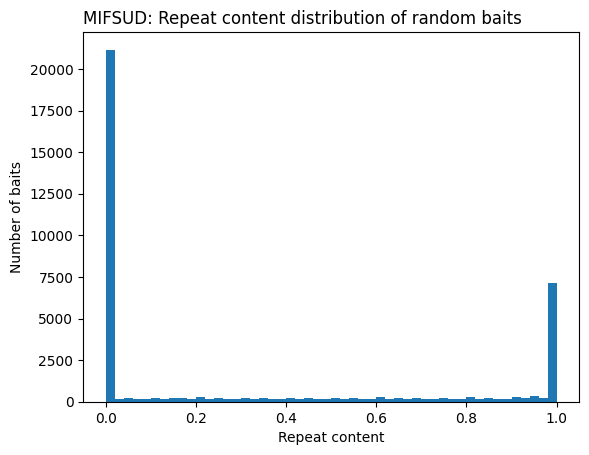

In [29]:
plt.hist(repeats, 50)
plt.title(author + ": Repeat content distribution of random baits", loc='left')
plt.ylabel("Number of baits")
plt.xlabel("Repeat content")
plt.show()